# Visualize the ON-OFF window of all households

In [1]:
%matplotlib ipympl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle # to access dataframe faster than csv
import glob, re

### Integrate data of all the households

In [2]:
file = open('preprocessed_dfs/batch_1_durations.pkl', 'rb')
df_b1 = pickle.load(file)

file = open('preprocessed_dfs/batch_2_durations.pkl', 'rb')
df_b2 = pickle.load(file)

file = open('preprocessed_dfs/batch_3_durations.pkl', 'rb')
df_b3 = pickle.load(file)

file = open('preprocessed_dfs/batch_4_durations.pkl', 'rb')
df_b4 = pickle.load(file)

windows_df_all = pd.concat([df_b1, df_b2, df_b3, df_b4])

windows_df_all.sort_values(by=['Duration'], inplace = True)
windows_ri_all = windows_df_all.reset_index()
windows_ri_all['LCLid'] = windows_ri_all['LCLid'].apply(lambda x: int(re.sub('\D', '', x)))
windows_ri_all.drop(columns = ['index'], inplace = True)

In [3]:
windows_ri_all

,LCLid,Enabled At,Disabled At,Duration
0,1150,2012-12-18 15:18:21,2012-12-18 15:18:21,0 days 00:00:00
1,5563,2012-12-19 12:32:41,2012-12-19 12:32:41,0 days 00:00:00
2,5560,2012-12-19 12:32:40,2012-12-19 12:32:40,0 days 00:00:00
3,5559,2012-12-19 12:32:39,2012-12-19 12:32:39,0 days 00:00:00
4,5556,2012-12-19 12:32:39,2012-12-19 12:32:39,0 days 00:00:00
...,...,...,...,...
5564,150,2011-11-23 10:00:00,2014-02-28 00:00:00,827 days 14:00:00
5565,149,2011-11-23 10:00:00,2014-02-28 00:00:00,827 days 14:00:00
5566,148,2011-11-23 10:00:00,2014-02-28 00:00:00,827 days 14:00:00
5567,147,2011-11-23 10:00:00,2014-02-28 00:00:00,827 days 14:00:00


In [3]:
windows_ri_all['Duration'][0:10]

0     0 days 00:00:00
1     0 days 00:00:00
2     0 days 00:00:00
3     0 days 00:00:00
4     0 days 00:00:00
5    75 days 02:30:00
6    86 days 13:30:00
7   105 days 13:00:00
8   107 days 11:30:00
9   121 days 05:36:58
Name: Duration, dtype: timedelta64[ns]

In [4]:
print(f"First Meter Enabled: \n {windows_ri_all.iloc[windows_df_all['Enabled At'].argmin()]}\n")
print(f"First Meter Disabled: \n {windows_ri_all.iloc[windows_df_all['Disabled At'].argmin()]}\n")
print(f"Last Meter Enabled: \n {windows_ri_all.iloc[windows_df_all['Enabled At'].argmax()]}\n")
print(f"Last Meter Disabled: \n {windows_ri_all.iloc[windows_df_all['Disabled At'].argmax()]}\n")
print(f"Number of Meters with ZERO duration: \n {windows_ri_all['Duration'][windows_ri_all['Duration'] == pd.Timedelta(0,'m')].count()}")

First Meter Enabled: 
 LCLid                          146
Enabled At     2011-11-23 09:00:00
Disabled At    2013-01-18 23:30:00
Duration         422 days 14:30:00
Name: 258, dtype: object

First Meter Disabled: 
 LCLid                         2534
Enabled At     2012-07-10 00:30:00
Disabled At    2012-09-23 03:00:00
Duration          75 days 02:30:00
Name: 5, dtype: object

Last Meter Enabled: 
 LCLid                         3559
Enabled At     2013-10-29 18:23:02
Disabled At    2014-02-28 00:00:00
Duration         121 days 05:36:58
Name: 9, dtype: object

Last Meter Disabled: 
 LCLid                         3559
Enabled At     2013-10-29 18:23:02
Disabled At    2014-02-28 00:00:00
Duration         121 days 05:36:58
Name: 9, dtype: object

Number of Meters with ZERO duration: 
 5


In [5]:
yr_act_count = []
yrs = windows_ri_all['Enabled At'].dt.year.unique()
for yr in yrs:
    print(f"Year: {yr} had {windows_ri_all['Enabled At'][windows_ri_all['Enabled At'].dt.year == yr].count()} activated meters")


Year: 2012 had 5144 activated meters
Year: 2013 had 14 activated meters
Year: 2011 had 411 activated meters


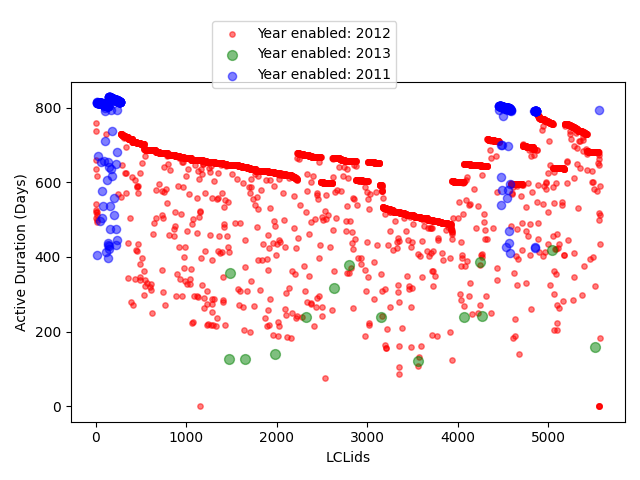

In [37]:
fig, ax = plt.subplots()
colors = ['red', 'green', 'blue']
sizes = [15,50,35]
for i, yr in enumerate(yrs):
    ax.scatter(windows_ri_all['LCLid'][windows_ri_all['Enabled At'].dt.year == yr],
               windows_ri_all['Duration'][windows_ri_all['Enabled At'].dt.year == yr].dt.days,
               s = sizes[i], 
               alpha = 0.5, 
               c = colors[i], label = f'Year enabled: {yr}')
ax.set_xlabel('LCLids'), ax.set_ylabel('Active Duration (Days)')
#ax.axhline(500,color = 'r')
ax.legend(bbox_to_anchor=(0.6, 1.2))
plt.tight_layout()

### Remove the households with zero duration

In [42]:
windows_ri_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   LCLid        5569 non-null   int64          
 1   Enabled At   5569 non-null   datetime64[ns] 
 2   Disabled At  5569 non-null   datetime64[ns] 
 3   Duration     5569 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), timedelta64[ns](1)
memory usage: 174.2 KB


In [39]:
data_nz_dur = windows_ri_all[windows_ri_all['Duration'] != pd.Timedelta(0, 'm')]

In [40]:
data_nz_dur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5564 entries, 5 to 5568
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   LCLid        5564 non-null   int64          
 1   Enabled At   5564 non-null   datetime64[ns] 
 2   Disabled At  5564 non-null   datetime64[ns] 
 3   Duration     5564 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), timedelta64[ns](1)
memory usage: 217.3 KB
